<a href="https://colab.research.google.com/github/babin411/Fusemachine-Internship/blob/main/Projects/Emotion%20Classification/Emotion_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install datasets

     |████████████████████████████████| 312 kB 5.2 MB/s 
     |████████████████████████████████| 1.1 MB 28.4 MB/s 
     |████████████████████████████████| 212 kB 42.0 MB/s 
     |████████████████████████████████| 67 kB 5.3 MB/s 
     |████████████████████████████████| 134 kB 47.7 MB/s 
     |████████████████████████████████| 127 kB 49.9 MB/s 
     |████████████████████████████████| 271 kB 45.8 MB/s 
     |████████████████████████████████| 94 kB 3.4 MB/s 
     |████████████████████████████████| 144 kB 50.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
from datasets import load_dataset

In [4]:
from datasets import Features, Value, ClassLabel

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

In [7]:
from google.colab import files

In [8]:
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv
Saving val.csv to val.csv


In [9]:
os.listdir(os.getcwd())

['.config', 'test.csv', 'val.csv', 'train.csv', 'sample_data']

In [10]:
train_path = os.path.join(os.getcwd(),'train.csv')
test_path = os.path.join(os.getcwd(),'test.csv')
validation_path = os.path.join(os.getcwd(),'val.csv')

In [11]:
datasets = load_dataset('csv', data_files = {
    'train': [train_path],
    'test': [test_path],
    'validation': [validation_path]
}, delimiter=';')

Using custom data configuration default-b22b83e2254e2646


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-b22b83e2254e2646/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [12]:
datasets

DatasetDict({
    train: Dataset({
        features: ['text,label'],
        num_rows: 16000
    })
    test: Dataset({
        features: ['text,label'],
        num_rows: 2000
    })
    validation: Dataset({
        features: ['text,label'],
        num_rows: 2000
    })
})

In [13]:
train_dataset = datasets['train']
train_dataset

Dataset({
    features: ['text,label'],
    num_rows: 16000
})

In [14]:
test_dataset = datasets['test']
test_dataset

Dataset({
    features: ['text,label'],
    num_rows: 2000
})

In [15]:
validation_dataset = datasets['validation']
validation_dataset

Dataset({
    features: ['text,label'],
    num_rows: 2000
})

In [16]:
train_dataset[0]

{'text,label': 'i didnt feel humiliated,sadness'}

In [17]:
train_dataset.features

{'text,label': Value(dtype='string', id=None)}

## Converting to DataFrame

In [18]:
# datasets.set_format(type="pandas")
# train_df = datasets["train"][:]
# train_df.head()

train_df = pd.read_csv('train.csv', sep=',')
train_df.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [19]:
# test_df = datasets['test'][:]
# test_df.head()

test_df = pd.read_csv('test.csv', sep=',')
test_df.head()

,text,label
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [20]:
# validation_df = datasets['validation'][:]
# validation_df.head()

validation_df = pd.read_csv('val.csv', sep=',')
validation_df.head()

,text,label
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [21]:
train_df['label'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [22]:
train_df['target'] = train_df['label'].map({
    'sadness': 0,
    'anger': 1,
    'love': 2,
    'surprise': 3,
    'fear': 4,
    'joy': 5, 
})

## Exploratory Data Analysis

In [23]:
train_df['label'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: label, dtype: int64

In [24]:
(train_df['label'].value_counts()/len(train_df))*100

joy         33.51250
sadness     29.16250
anger       13.49375
fear        12.10625
love         8.15000
surprise     3.57500
Name: label, dtype: float64

Text(0.5, 1.0, "Pie Chart for 'stroke' distribution")

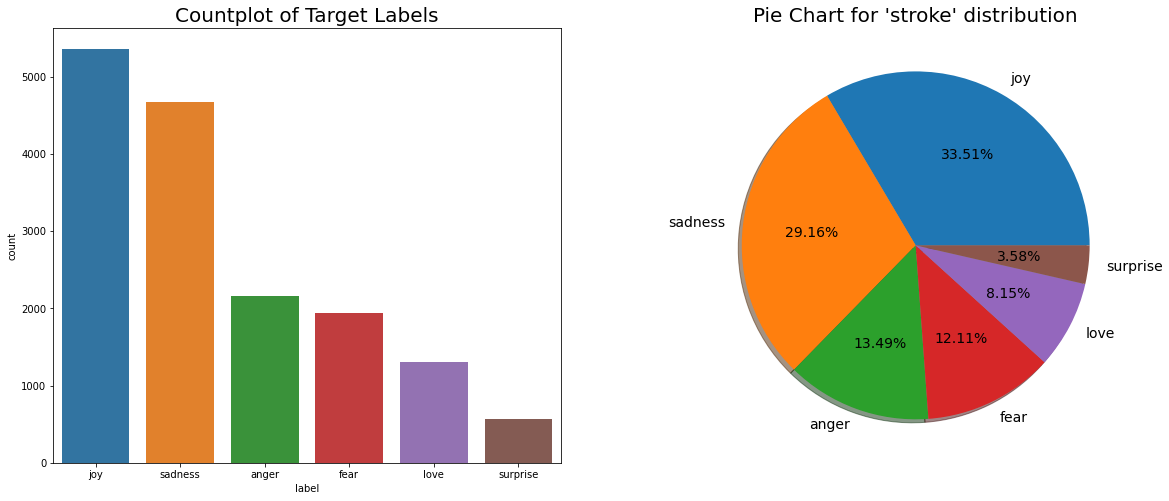

In [25]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
#Countplot
sns.countplot(data=train_df, x='label', order=train_df['label'].value_counts(ascending=False).index, ax=ax[0])
ax[0].set_title('Countplot of Target Labels', fontsize=20)

#Pie-Chart
type_counts = train_df.label.value_counts()
ax[1].pie(type_counts, labels=type_counts.index,startangle=0, autopct="%1.2f%%", shadow=True,
        colors = sns.color_palette('tab10'),textprops={'fontsize':14})
plt.title("Pie Chart for 'stroke' distribution", fontsize=20)

From the above countplot and pie-chart we can see that the given dataset is an imbalanced type of dataset as `joy` and `sadness` make up for more than half of the target label. and the remainging `4` targets labels make up for the remaining observations.

### Analyzing Text Statistics
Exploring the fundamental characteristics of the text data. Some of the analysis which can be helpful are:-
- `text length`: The Text Lenght Analysis involves calculating the length of text for each sentence.
- `word frequency analysis`: Calculating the word count in the form of Unigrams, Bigrams, and Trigrams

In [26]:
pd.options.display.max_colwidth=150

In [27]:
train_df['text_length'] = train_df['text'].astype(str).apply(len)
train_df.head()

,text,label,target,text_length
0,i didnt feel humiliated,sadness,0,23
1,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,sadness,0,108
2,im grabbing a minute to post i feel greedy wrong,anger,1,48
3,i am ever feeling nostalgic about the fireplace i will know that it is still on the property,love,2,92
4,i am feeling grouchy,anger,1,20


In [28]:
train_df['text_word_count'] = train_df['text'].str.split().apply(len)
train_df.head()

,text,label,target,text_length,text_word_count
0,i didnt feel humiliated,sadness,0,23,4
1,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,sadness,0,108,21
2,im grabbing a minute to post i feel greedy wrong,anger,1,48,10
3,i am ever feeling nostalgic about the fireplace i will know that it is still on the property,love,2,92,18
4,i am feeling grouchy,anger,1,20,4


### Distribution Plot for Text Length

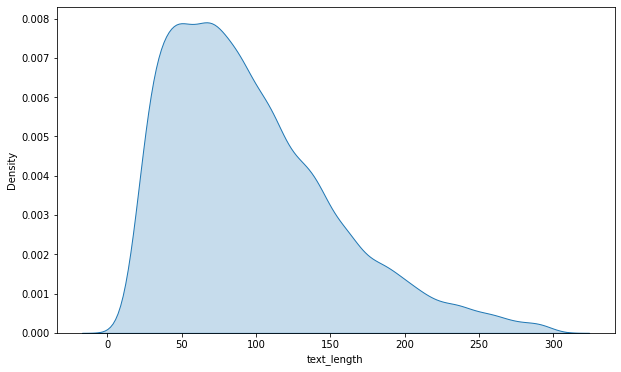

In [29]:
fig, ax= plt.subplots(figsize=(10,6))
sns.kdeplot(x='text_length',data=train_df,shade=True,ax=ax, )

From the above kernel density estimate plot, we can see that we have a rigth skewed distribution and that most of the tweet ranges from around 30-100 characters.

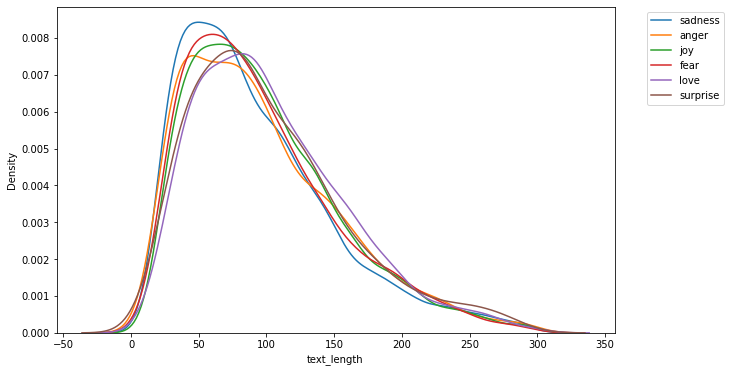

In [30]:
fig, ax= plt.subplots(figsize=(10,6))
sns.kdeplot(x='text_length',data=train_df[train_df['label']=='sadness'],ax=ax, label='sadness')
sns.kdeplot(x='text_length',data=train_df[train_df['label']=='anger'],ax=ax, label='anger')
sns.kdeplot(x='text_length',data=train_df[train_df['label']=='joy'],ax=ax, label='joy')
sns.kdeplot(x='text_length',data=train_df[train_df['label']=='fear'],ax=ax, label='fear')
sns.kdeplot(x='text_length',data=train_df[train_df['label']=='love'],ax=ax, label='love')
sns.kdeplot(x='text_length',data=train_df[train_df['label']=='surprise'],ax=ax, label='surprise')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

From the above kernel  density estimate, we can see that, the text_length for all of the emotions are nearly the same and hence have almost idential distribution therefore the kde plot for each sentiment overlaps with each other. 

### Box Plot Distribution for Word Frequency

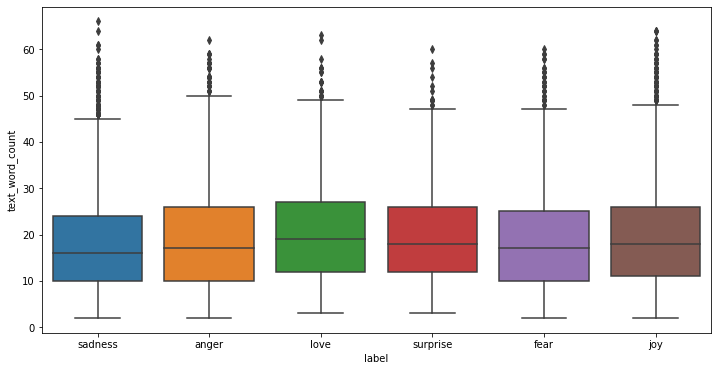

In [31]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(data=train_df,y='text_word_count', x='label',)

From the above box plot we can see that most of the tweets have an average in the range of 15-18. It can also be seen that all the text appears to have more or less the same length, hence, the length of the text i.e `word frequency` is not a good indicator for emotion classification.

### Data Cleaning

In [32]:
import string

In [33]:
dir(string)

['Formatter',
 'Template',
 '_ChainMap',
 '_TemplateMetaclass',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_re',
 '_string',
 'ascii_letters',
 'ascii_lowercase',
 'ascii_uppercase',
 'capwords',
 'digits',
 'hexdigits',
 'octdigits',
 'printable',
 'punctuation',
 'whitespace']

In [34]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
for text in train_df['text']:
    if string.punctuation  in text:
        print(text)

In [36]:
for text in train_df['text']:
    if string.digits in text:
        print(text)

We can see that there are no punctuations or numbers and only contains alphabets.

The above dataframe, shows the Tf-idf scores of the first document.

In [37]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

In [38]:
tfidf_vectorizer = TfidfVectorizer(tokenizer = LemmaTokenizer(),
                                  stop_words ='english',
                                  lowercase=True)

In [39]:
train_df['text'].values

array(['i didnt feel humiliated',
       'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
       'im grabbing a minute to post i feel greedy wrong', ...,
       'i feel strong and good overall',
       'i feel like this was such a rude comment and im glad that t',
       'i know a lot but i feel so stupid because i can not portray it'],
      dtype=object)

In [40]:
train_df['text'].values.shape

(16000,)

In [41]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [42]:
tfidf_vector = tfidf_vectorizer.fit_transform(train_df['text'].values)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


In [43]:
tfidf_vector

<16000x13317 sparse matrix of type '<class 'numpy.float64'>'
	with 134234 stored elements in Compressed Sparse Row format>

In [44]:
tfidf_vector.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
X = pd.DataFrame(tfidf_vector.toarray(), columns=tfidf_vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [46]:
X

,aa,aaaaaaand,aaaaand,aaaand,aac,aahhh,aaron,ab,abandon,abandoned,...,zoned,zonisamide,zoo,zoom,zooming,zq,zucchini,zum,zumba,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
y = train_df['target']
y.head()

0    0
1    0
2    1
3    2
4    1
Name: target, dtype: int64

# Models

## MultinomialNB

In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.3, random_state = 42)

In [51]:
NBmodel = MultinomialNB()

In [52]:
# fitting
NBmodel.fit(X_train,y_train)

MultinomialNB()

In [53]:
y_preds = NBmodel.predict(X_test)

In [54]:
length=0
for i,j in zip(y_preds,y_test):
    length+=1
    print(i," -------- ",j)
    if length==5:
        break

0  --------  0
5  --------  5
0  --------  0
5  --------  5
0  --------  0


In [55]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.71      0.92      0.80      1434
           1       0.91      0.29      0.44       607
           2       1.00      0.03      0.05       434
           3       0.00      0.00      0.00       178
           4       0.96      0.24      0.38       566
           5       0.60      0.98      0.74      1581

    accuracy                           0.67      4800
   macro avg       0.70      0.41      0.40      4800
weighted avg       0.73      0.67      0.59      4800



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
print(accuracy_score(y_test, y_preds))

0.6658333333333334


## Complement NB

In [57]:
from sklearn.naive_bayes import ComplementNB

In [58]:
compNB = ComplementNB()

In [59]:
# fitting
compNB.fit(X_train,y_train)

ComplementNB()

In [60]:
y_preds = compNB.predict(X_test)

In [61]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1434
           1       0.87      0.86      0.86       607
           2       0.84      0.75      0.80       434
           3       0.77      0.71      0.74       178
           4       0.88      0.82      0.85       566
           5       0.88      0.92      0.90      1581

    accuracy                           0.88      4800
   macro avg       0.86      0.83      0.84      4800
weighted avg       0.88      0.88      0.88      4800



In [62]:
print(accuracy_score(y_test, y_preds))

0.8797916666666666


## Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
random_forest_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42,n_jobs=-1)
random_forest_clf.fit(X_train,y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [65]:
y_preds = random_forest_clf.predict(X_test)

In [66]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.96      0.22      0.36      1434
           1       1.00      0.00      0.01       607
           2       0.00      0.00      0.00       434
           3       0.00      0.00      0.00       178
           4       1.00      0.01      0.01       566
           5       0.35      1.00      0.52      1581

    accuracy                           0.40      4800
   macro avg       0.55      0.21      0.15      4800
weighted avg       0.65      0.40      0.28      4800



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
print(accuracy_score(y_test, y_preds))

0.39625


## Support Vector Machine

In [68]:
from sklearn.svm import LinearSVC

In [69]:
sv = LinearSVC()
sv.fit(X_train,y_train)

LinearSVC()

In [70]:
y_preds = sv.predict(X_test)

In [71]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1434
           1       0.89      0.87      0.88       607
           2       0.84      0.74      0.79       434
           3       0.88      0.72      0.79       178
           4       0.87      0.83      0.85       566
           5       0.88      0.94      0.91      1581

    accuracy                           0.89      4800
   macro avg       0.88      0.84      0.86      4800
weighted avg       0.89      0.89      0.89      4800



In [72]:
print(accuracy_score(y_test, y_preds))

0.8875


## XGboost

In [73]:
from xgboost import XGBClassifier

In [74]:
xgboost = XGBClassifier(objective="reg:logistic", random_state=42,use_label_encoder = False)

In [75]:
xgboost.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob', random_state=42,
              use_label_encoder=False)

In [76]:
predictions = xgboost.predict(X_test)

In [77]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.73      0.82      1434
           1       0.93      0.58      0.71       607
           2       0.93      0.59      0.72       434
           3       0.86      0.62      0.72       178
           4       0.94      0.56      0.70       566
           5       0.60      0.97      0.74      1581

    accuracy                           0.75      4800
   macro avg       0.87      0.68      0.74      4800
weighted avg       0.82      0.75      0.76      4800



In [78]:
print(accuracy_score(y_test,predictions))

0.7545833333333334
